# 1.5 Фильтрация данных

## вопрос

##### Аналитик Ярослав захотел отфильтровать данные по комбинации условий и отобрать только те наблюдения, у которых значение по переменной writing score >  100, а значение переменной gender == female. Для этого Ярослав написал следующий запрос: 

**students_performance[students_performance['writing score'] > 100 and students_performance.gender == 'female']**

Однако в результате получил такую ошибку:

**Truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()**

Ошибки являются важной и неотъемлемой частью обучения. Не бойтесь, что поначалу большая часть ваших запросов будет завершаться чем-то подобным. Уметь находить причину ошибки - очень ценный навык. Во-первых, можно разобраться самому, но не менее полезно обратиться за помощью к более опытным коллегам. Давайте проверим, сталкивался кто-либо с подобной проблемой? 

Запрос в гугл с текстом ошибки сразу же приводит нас на https://stackoverflow.com. Обещаю, вы полюбите этот сайт!)

Итак, давайте разберемся в чем же была проблема с запросом Ярослава? Изучите обсуждение этой проблемы на stackoverflow.com. 

##### Ответ:

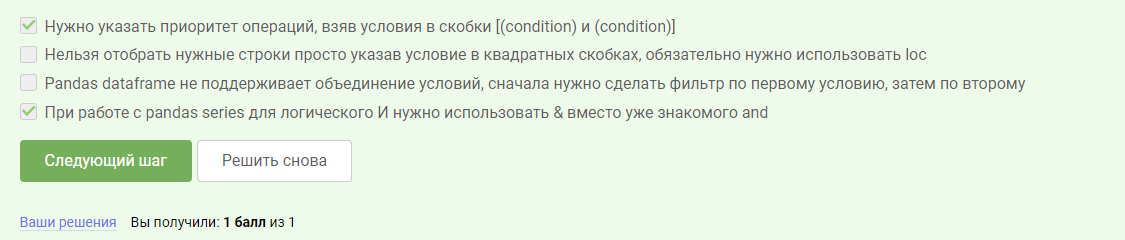

# вопрос

## У какой доли студентов из датасэта в колонке lunch указано free/reduced?

StudentsPerformance.csv

Формат ответа десятичная дробь, например, 0.25

In [2]:
import pandas as pd
import numpy as np

In [3]:
SP = pd.read_csv('StudentsPerformance.csv')

In [4]:
SP

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
SP.lunch.value_counts(normalize=True)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

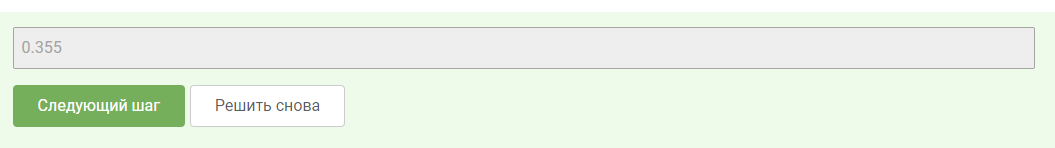

# вопрос

## Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?

In [9]:
SP.groupby('lunch').describe()

math score                                                       \
                  count       mean        std   min   25%   50%   75%    max   
lunch                                                                          
free/reduced      355.0  58.921127  15.159956   0.0  49.0  60.0  69.0  100.0   
standard          645.0  70.034109  13.653501  19.0  61.0  69.0  80.0  100.0   

             reading score             ...              writing score  \
                     count       mean  ...   75%    max         count   
lunch                                  ...                              
free/reduced         355.0  64.653521  ...  75.0  100.0         355.0   
standard             645.0  71.654264  ...  82.0  100.0         645.0   

                                                                   
                   mean        std   min   25%   50%   75%    max  
lunch                                                              
free/reduced  63.022535  15.433823  10.0  53.0  64.0  74.0  100.0  
standard      70.823256  14.339487  22.0  62.0  72.0  81.0  100.0  

[2 rows x 24 columns]

In [15]:
SP.groupby('lunch').var()

,math score,reading score,writing score
lunch,,,
free/reduced,229.824270,221.871139,238.202881
standard,186.418089,191.285560,205.620887


In [19]:
SP.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [12]:
SP[SP.lunch == 'standard'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [13]:
SP[SP.lunch == 'free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [24]:
SP.loc[SP.lunch == 'free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [14]:
SP[SP.lunch == 'standard'].var()

math score       186.418089
reading score    191.285560
writing score    205.620887
dtype: float64

In [16]:
SP[SP.lunch == 'free/reduced'].var()

math score       229.824270
reading score    221.871139
writing score    238.202881
dtype: float64

In [17]:
SP[SP.lunch == 'free/reduced'].mean()

math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

In [18]:
SP[SP.lunch == 'standard'].mean()

math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64

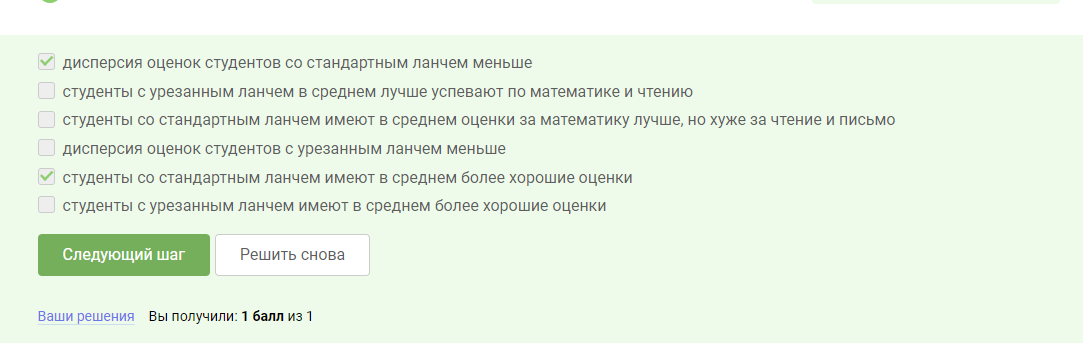

In [23]:
# Чужое
SP.groupby (by='lunch')\
    .aggregate ({'math score':('mean','var'), 'reading score':('mean','var'),'writing score': ('mean','var')})

math score             reading score             writing score  \
                   mean         var          mean         var          mean   
lunch                                                                         
free/reduced  58.921127  229.824270     64.653521  221.871139     63.022535   
standard      70.034109  186.418089     71.654264  191.285560     70.823256   

                          
                     var  
lunch                     
free/reduced  238.202881  
standard      205.620887

In [26]:
SP.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
SP = SP.rename(columns=
              {'parental level of education': 'parental_level_of_education',
               'test preparation course': 'test_preparation_course',
               'math score': 'math_score',
               'reading score': 'reading_score',
               'writing score': 'writing_score'})

In [5]:
SP

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
SP.query('reading_score > 74 & reading_score >70')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [12]:
writing_score_query = 90

In [13]:
SP.query('reading_score > @writing_score_query')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
102,female,group D,associate's degree,standard,none,85,91,89
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
962,female,group E,associate's degree,standard,none,100,100,100
970,female,group D,bachelor's degree,standard,none,89,100,100
979,female,group C,associate's degree,standard,none,91,95,94


# вопрос

## Соотнесите строчку кода и результат её выполнения. Переменная student_stats содержит датафрэйм с данными о студентах.

 

Чтобы было удобно, сойдёмся на одинаковых терминах

parental level of education - уровень образования родителей

bachelor's degree - бакалаврская степень

master's degree - магистерская степень

test preparation course - тест

наблюдения, студенты, строки - одно и то же в данном случае

In [14]:
# студенты со стандартным ланчем
SP.query("lunch == 'standard'")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
987,male,group E,some high school,standard,completed,81,75,76
991,female,group B,some high school,standard,completed,65,82,78
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95


In [15]:
# отберёт студентов, уровень образования родителей которых бакалавр или магистр
SP[SP['parental_level_of_education'].isin(["bachelor's degree", "master's degree"])]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
14,female,group A,master's degree,standard,none,50,53,58
18,male,group C,master's degree,free/reduced,completed,46,42,46
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
969,female,group B,bachelor's degree,standard,none,75,84,80
970,female,group D,bachelor's degree,standard,none,89,100,100
993,female,group D,bachelor's degree,free/reduced,none,62,72,74


In [17]:
# наблюдения, оценка за математику которых выше 90 и за чтение меньше либо равна 72
SP[(SP['math_score'] > 90) & (SP['reading_score'] <=72)]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [18]:
# студенты, не прошедшие тест
SP[SP['test_preparation_course'] != 'completed']

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
996,male,group C,high school,free/reduced,none,62,55,55


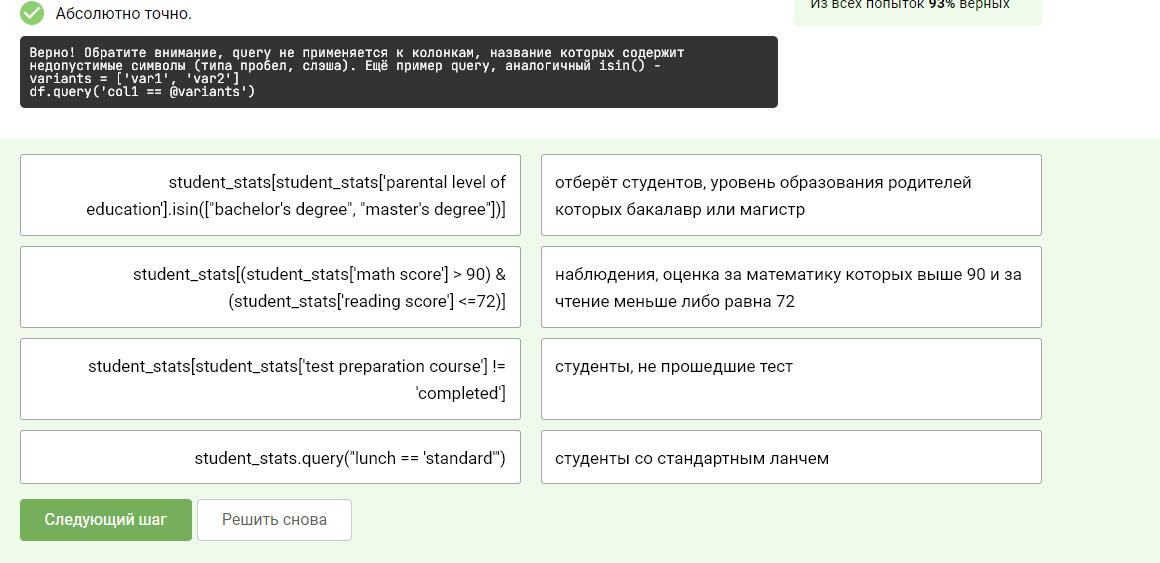

In [21]:
SP[['math_score','reading_score']]

,math_score,reading_score
0,72,72
1,69,90
2,90,95
3,47,57
4,76,78
...,...,...
995,88,99
996,62,55
997,59,71
998,68,78


In [22]:
list(SP)

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [27]:
score_columns = [i for i in list(SP) if 'score' in i]

In [28]:
SP[score_columns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [30]:
# через пандас
SP.filter(like='score').head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [32]:
mini_df = SP.iloc[0:5]
mini_df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
mini_df.index = ['маня','вася','петя','сигузмунд','мойша']
mini_df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
маня,female,group B,bachelor's degree,standard,none,72,72,74
вася,female,group C,some college,standard,completed,69,90,88
петя,female,group B,master's degree,standard,none,90,95,93
сигузмунд,male,group A,associate's degree,free/reduced,none,47,57,44
мойша,male,group C,some college,standard,none,76,78,75


In [35]:
# axis=1  по умолчанию
mini_df.filter(like='e', axis=1 ).head()

,gender,race/ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score
маня,female,group B,bachelor's degree,none,72,72,74
вася,female,group C,some college,completed,69,90,88
петя,female,group B,master's degree,none,90,95,93
сигузмунд,male,group A,associate's degree,none,47,57,44
мойша,male,group C,some college,none,76,78,75


In [36]:
# отбираем строки
mini_df.filter(like='я', axis=0 ).head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
маня,female,group B,bachelor's degree,standard,none,72,72,74
вася,female,group C,some college,standard,completed,69,90,88
петя,female,group B,master's degree,standard,none,90,95,93


# вопрос

## Изучите документацию метода filter и укажите правильные утверждения 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html

Также есть ещё похожий метод select_dtypes, отбирающий по типам колонок.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

In [38]:
mini_df.dtypes

gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

DataFrame.select_dtypes(include=None, exclude=None)

In [39]:
mini_df.select_dtypes(include=['int64'])

,math_score,reading_score,writing_score
маня,72,72,74
вася,69,90,88
петя,90,95,93
сигузмунд,47,57,44
мойша,76,78,75


In [40]:
# отбираем строки
mini_df.select_dtypes(exclude=['int64']) 

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course
маня,female,group B,bachelor's degree,standard,none
вася,female,group C,some college,standard,completed
петя,female,group B,master's degree,standard,none
сигузмунд,male,group A,associate's degree,free/reduced,none
мойша,male,group C,some college,standard,none


DataFrame.filter(items=None, like=None, regex=None, axis=None)

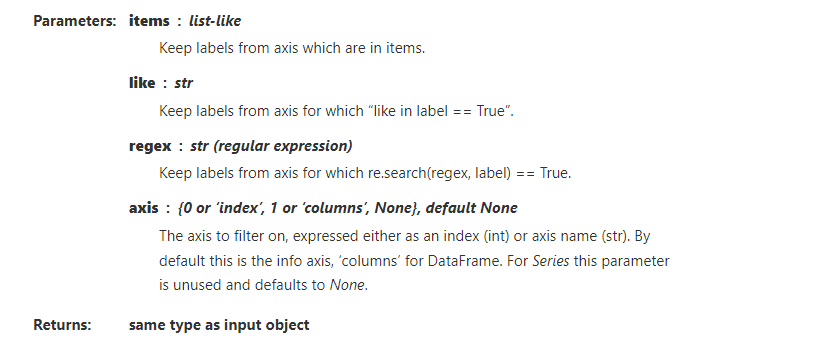

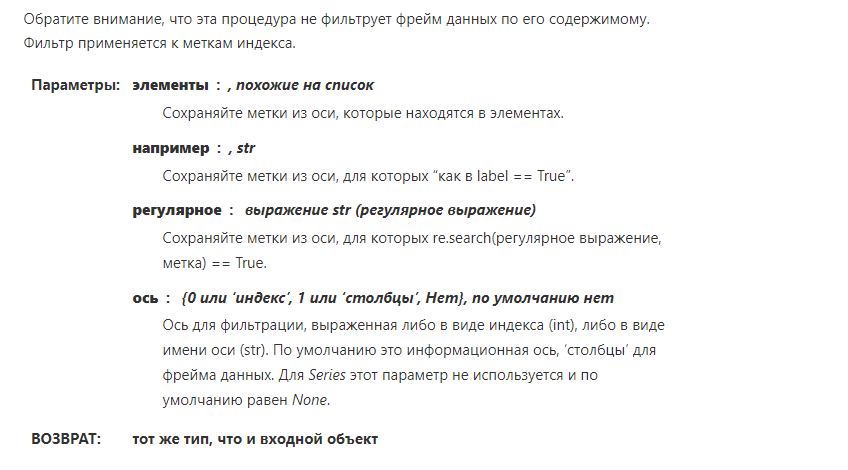

>>> # select columns by name
>>> df.filter(items=['one', 'three'])
         one  three
mouse     1      3
rabbit    4      6

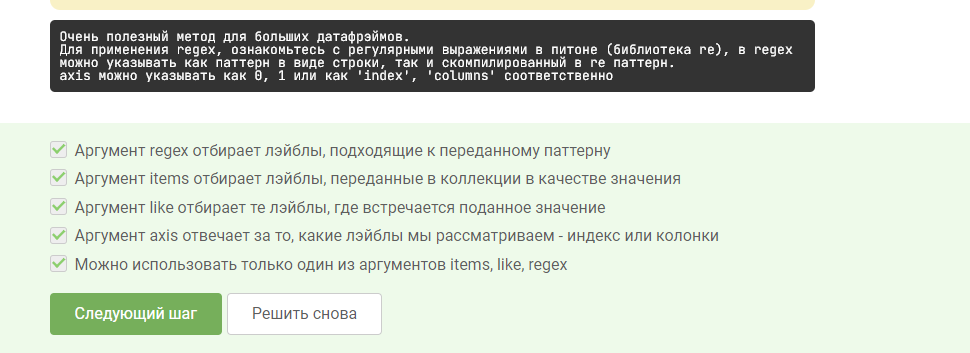

## Важной частью нашего курса будут задачи на программирование. Давайте попробуем решить первую задачу вместе.

В переменной df  сохранен датафрэйм с произвольным числом колонок и строк. Отберите колонки, в которых есть '-' в датафрэйме df (вот соответствующий датасэт). Сохраните их в переменную selected_columns
column_hell.csv
Если в условии задачи сообщается, что в некой переменной уже сохранен датафрэйм или другой объект, не нужно пересоздавать его самостоятельно, сразу начинайте работать с этой переменной.

В нашем случае для отбора колонок соответствующих условию мы могли бы написать следующий код:

selected_columns = df.filter(like='-')
Засабмитим решение и убедимся, что оно правильное:

In [41]:
df = pd.read_csv('column_hell.csv')

In [42]:
df

,yrh&6,ohku,q,hfxx,umeca-4,apj,g,ijvnixxo,kudbpyw-3,upubjv,...,fi,clsruyy,g&6,qo$6,ap,o,sladymzr,tif,wuikzxt,wzuvc
0,0.288397,0.911359,0.488069,0.074599,0.016124,0.090555,0.560810,0.110975,0.430787,0.548763,...,0.793122,0.070335,0.145115,0.686579,0.071681,0.563068,0.815201,0.081902,0.333237,0.185148
1,0.861276,0.134987,0.701885,0.897921,0.507115,0.740151,0.963179,0.712024,0.671662,0.497596,...,0.477181,0.767931,0.996055,0.948774,0.054327,0.087341,0.072166,0.856081,0.120481,0.622113
2,0.775577,0.832874,0.862665,0.831049,0.003274,0.703112,0.509795,0.573296,0.286411,0.282792,...,0.421542,0.770413,0.749468,0.395022,0.307752,0.535575,0.341393,0.971201,0.714558,0.702453
3,0.857910,0.555818,0.598305,0.473988,0.784139,0.427963,0.725103,0.286610,0.863717,0.545562,...,0.240252,0.010355,0.759912,0.965837,0.110719,0.439488,0.816526,0.111621,0.373365,0.461615
4,0.748652,0.451725,0.252619,0.584361,0.011265,0.051115,0.755444,0.627191,0.206172,0.955043,...,0.846165,0.043458,0.209347,0.028276,0.700446,0.203503,0.181903,0.428842,0.099398,0.175227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.665300,0.744322,0.377087,0.809735,0.220817,0.248306,0.131914,0.217087,0.434444,0.852261,...,0.469934,0.940416,0.012272,0.519183,0.231462,0.778445,0.979528,0.742654,0.070859,0.595118
96,0.344394,0.182979,0.590196,0.483025,0.474131,0.031048,0.672095,0.573249,0.176011,0.847096,...,0.954133,0.073519,0.708749,0.942929,0.050652,0.902627,0.478454,0.895962,0.254965,0.963576
97,0.694568,0.507591,0.328004,0.333993,0.091637,0.356788,0.541017,0.040395,0.871606,0.680075,...,0.300616,0.172525,0.984465,0.645257,0.184107,0.322045,0.011599,0.197995,0.841725,0.695915
98,0.692840,0.220333,0.729843,0.202430,0.360106,0.980271,0.913669,0.549889,0.172385,0.049770,...,0.188240,0.053409,0.928515,0.135282,0.352835,0.046042,0.667842,0.633934,0.547764,0.232205


In [43]:
selected_columns = df.filter(like='-')

In [44]:
selected_columns

,umeca-4,kudbpyw-3,g-3,v-9,fla-6,hwtbyrkp-5
0,0.016124,0.430787,0.202407,0.725508,0.305076,0.979296
1,0.507115,0.671662,0.864249,0.867818,0.358859,0.160520
2,0.003274,0.286411,0.928865,0.719159,0.340235,0.734612
3,0.784139,0.863717,0.175446,0.554744,0.049325,0.621132
4,0.011265,0.206172,0.044151,0.163643,0.048806,0.437836
...,...,...,...,...,...,...
95,0.220817,0.434444,0.601738,0.146333,0.918888,0.216499
96,0.474131,0.176011,0.359793,0.104707,0.257690,0.066934
97,0.091637,0.871606,0.121075,0.907699,0.313184,0.788592
98,0.360106,0.172385,0.015285,0.019571,0.060751,0.403166


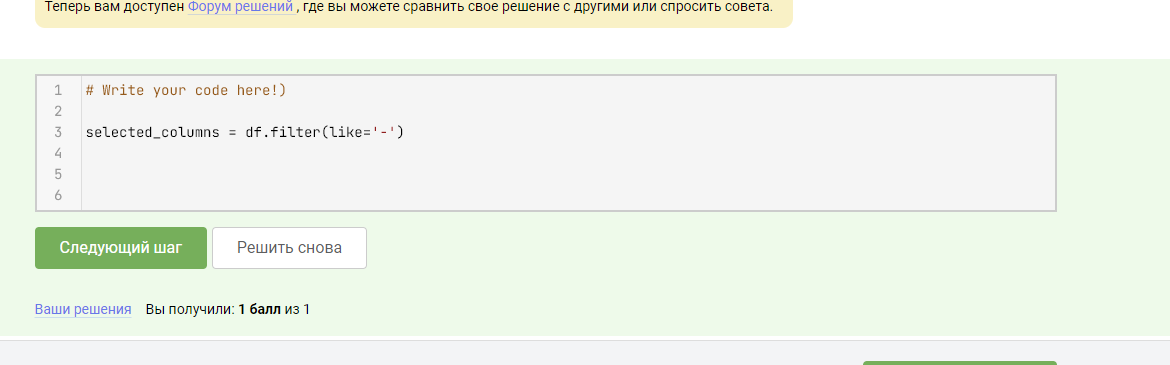